# CSX46 Homework Assignment 2

## Updated Feb. 2, 2023

In this homework assignment you will be analyzing a gene regulatory network for the bacterial model species *E.&nbsp;coli*.

# Install cairo and igraph; import cairo, igraph, pandas, matplotlib, numpy, random, and itertools

In [1]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install python-igraph
import cairo
import numpy as np
import igraph
import pandas as pd
import matplotlib as plt
import random
import itertools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgif-dev is already the newest version (5.1.9-1).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libseli

You will also need to download the file `ecolitfnet.txt` from the CSX46 S3 bucket, from the URL [https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt](https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt). In case you want to check that you have a complete and uncorrupted version of the file, here is it's MD5 checksum: 89d3688fca40e34cff23f4c2b703e427.

In [2]:
#imports ecolitfnet.txt file
!curl https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt --output ecolitfnet.txt
!head ecolitfnet.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2381  100  2381    0     0   5642      0 --:--:-- --:--:-- --:--:--  5628
ADA	AIDB
ADIY	GADX
ALLR	ALLS
ARCA	BETI
ARCA	DPIA
ARCA	FNR
ARCA	GADE
ARCA	GADX
ARCA	LLDR
ARCA	PUUR


For consistency of results, go ahead and set the random number seed to 1337


In [3]:
#set random seed to 1337
random.seed(1337)

Load in the *E.&nbsp;coli* operon-operon network (gene regulatory network) data in edge-list format; display the first six lines of data as a sanity check. Use `pandas.read_csv` and `pandas.DataFrame.head`.

In [4]:
# Load the edgelist into a Pandas dataframe
edge_list_df = pd.read_csv("ecolitfnet.txt", sep="\t", names=["source","target"])
edge_list_df.shape
edge_list_df.head(n=6)
print(edge_list_df.shape)

(261, 2)


Make an igraph directed graph from the network; print a graph summary as a sanity check.  You will need to use `igraph.Graph.TupleList` and `summary`.


In [5]:
#Creates igraph and returns summary
g = igraph.Graph.TupleList(edge_list_df.values.tolist(), directed=True)
g.summary()

'IGRAPH DN-- 133 261 -- \n+ attr: name (v)'

# Part I: Three-vertex motif analysis

## Question 1
 
_There are 13 different types of connected 3-vertex motifs (“isomorphism classes”) for a digraph. Which one of these motifs is most frequent in the E. coli regulatory network?_

##Answer:
**After examining the position of motif counts in the list, it was found that motif "Class 6" had the highest frequency of occurrence among three-vertex motifs, with a count of 1,676.**

Obtain the counts of all three-vertex motifs in the graph. You will need to use the `motifs_randesu` method in `igraph.Graph`.

In [6]:
#counts the number of motifs in the graph
g.motifs_randesu()

[nan, nan, 275, nan, 125, 39, 1676, 47, 25, 68, 0, 0, 2, 10, 1, 1]

## Question 2, part A

_Which one of these motifs has a count of 47 in the regulatory network?

##Answer:
**Class 7 is the motif having a count of 47 on the "real graph"**

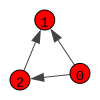

In [7]:
# Plot a network diagram of the motif
#generates and example of a directed three vertex graph
testg = igraph.Graph.TupleList([[0,2], [1,2], [0,1]], directed=True)
igraph.drawing.plot(testg, bbox=[0,0,100,100], vertex_label=["0", "1", "2"])

Now, call the `igraph.Graph.isoclass` method on the three-vertex igraph graph that you just created. It should return 7.

In [8]:
# print the isomorphism class
#def isoclass(vertices): ¶
igraph.Graph.isoclass(testg)

7

## Question 2, part B

_What are the mean and standard deviation of the MM counts for the 1,000 random 
networks?_

##Answer:
**Mean number of FFLs on random networks: 57.2079**

**Standard deviation of the number of FFLs on random networks: 9.297788854883724**

**see below code output**

Get motif counts for 10,000 different randomizations of the network.  You will need to use a `for` loop, `igraph.Graph.copy`, `igraph.Graph.rewire`, and `append`.  You can specify n=1000 for the rewiring.  You can use `itertools.repeat` to perform 10,000 loops if you like.

In [9]:
# create motif empty list
motif = []

# loop for 10k ranndomization
for i in itertools.repeat(None, 10000):
    #copies the original graph
    g_copy = g.copy()
    # rewires edge
    g_copy.rewire(n=1000)
    #motif count
    motif.append(g_copy.motifs_randesu(size=3))
# print the motif counts for each randomization
print(motif[0:5])


[[nan, nan, 350, nan, 288, 19, 1764, 55, 2, 22, 0, 1, 0, 0, 0, 0], [nan, nan, 376, nan, 334, 0, 1791, 52, 0, 0, 0, 3, 0, 0, 0, 0], [nan, nan, 353, nan, 313, 12, 1779, 61, 1, 2, 0, 1, 0, 0, 0, 0], [nan, nan, 367, nan, 331, 0, 1782, 61, 0, 0, 0, 1, 0, 0, 0, 0], [nan, nan, 355, nan, 304, 11, 1777, 57, 2, 6, 0, 2, 1, 0, 0, 0]]


For each motif type, compute the mean and standard deviation of the counts of appearances of the motif in each of the 10,000 randomly rewired graphs. You will need to use the `numpy.mean` and `numpy.std` functions.

Print out the mean and the standard deviation of the numbers of FFLs in random networks. Print the number of FFLs on the real network. The FFL should be in the 7th element (starting from zero!) of the vector returned from `motifs_randesu`.

In [10]:
#finds mean and std for 7th element in the motif using list comprehension
mean_FFLS = np.mean([pos[7] for pos in motif])
std_FFLS = np.std([pos[7] for pos in motif])

#prints results mean_FFLS as meand and std_FFLS as stan dev
print(f"Mean number of FFLs on random networks: {mean_FFLS}\nStandard deviation of the number of FFLs on random networks: {std_FFLS}")

Mean number of FFLs on random networks: 57.2079
Standard deviation of the number of FFLs on random networks: 9.297788854883724


## Question 3

_What is the Z-score for enrichment of the MM count for the real network vs. the ensemble of random networks?  
Does this Z-score correspond to a statistically significant positive enrichment?

##Answer:
**Z-score for the FFL count on the real network vs. the random networks: -1.0978846862755156**

**No, this Z-score value of -1.09 indicates that the FFL count on the real network is lower than the FFL count on the random networks. Therefore, it does not correspond to a statistically significant positive enrichment.**


For each motif type, obtain the *Z* score for the number of appearances of the motif in the real network, vs. in the randomly rewired networks. Note, some of the motif counts are all zero, so we will set NumPy to ignore divide-by-zero errors before we do the vector element-wise division operation.

Print the _z_-score for the FFL

In [11]:
#ignores /0 error
np.seterr(divide='ignore')

# add code to compute the z-score(observed count - mean of random counts) / standard deviation of random counts
# compute observed FFL count in real network
obs_FFLS = g.motifs_randesu(size=3)[7]

# compute Z score for FFL motif
z_FFLS = (obs_FFLS - mean_FFLS) / std_FFLS

#prints results
print(f"Z-score for the FFL count on the real network vs. the random networks: {z_FFLS}")

Z-score for the FFL count on the real network vs. the random networks: -1.0978846862755156


## Question 4. 

_What is the ratio of the MM count for the real network to the average MM count for the random networks?_

Print out the ratio of the FFL count for the real network, to the average FFL count for the random networks

In [12]:
#caluclates ratio of real vs random
r_FFLS = (obs_FFLS/mean_FFLS)

#prints rounded ratio
print(f"Ratio of FFL count, real network to avg of random networks: {r_FFLS:.2f}")

Ratio of FFL count, real network to avg of random networks: 0.82


## Question 5. 

_How does ratio compare to the same ratio for the data in Table 1 in Shen-Orr et al., Nature Genetics, 2002?_

##Answer:
**The ratio from above is 0.82, compared to the ratio of FFL count in Table 1 of Shen-Orr et al., the ratio score is much lower. The Shen-Orr ratio score is 5.80, which indicates a much higher enrichment of FFLs in the real network compared to the randomized networks for the network in Shen-Orr et al.**


Adding up the first two rows of Table 1 in Shen-Orr et al., we get a count of 40 FFLs in the real network vs. an average of 6.9 in the randomized networks. Print the ratio:

In [13]:
real_FFLS = 40
mean_rand_FFLS = 6.9
shen_ratio = (real_FFLS/mean_rand_FFLS)
print(f'Shen-Orr ratio score: {shen_ratio:.2f}')

Shen-Orr ratio score: 5.80


## Question 6

_Given the modest ratio of the MM frequency in the real network vs. randomly shuffled network, should we entertain the possibility that the high frequency of MMs in the real network could be a consequence of the degree distribution rather than evolution specifically “favoring” FFLs as a building block for gene regulatory networks?_

##Answer
**Yes, we can consider this possiblity**

# Part II. Four-vertex motif analysis

## Question 1

_What is the count of this four-vertex motif in the E. coli gene regulatory network?_

##Answer:
**297, from code below**

Figure out the isomorphism class of the network shown in the assignment in Canvas.  You'll want to build an edge-list tuple-list and then an igraph `Graph` object using `Graph.TupleList` (make sure to specify a directed graph!), and then use the `igraph.Graph.isoclass` method.

In [14]:
edge_list_2 = pd.DataFrame([(1,3), (1,4), (2,3), (2,4)], columns=["source","target"])
edge_list_2.head(n=4)

,source,target
0,1,3
1,1,4
2,2,3
3,2,4


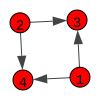

In [15]:
#generates and example of a directed an over-represented four-vertex  motif
g2 = igraph.Graph.TupleList(edge_list_2.values.tolist(), directed=True)
igraph.drawing.plot(g2, bbox=[0,0,100,100], vertex_label=["1", "3", "4", "2"])

In [16]:
#prints gr graph summary
print(g2.summary())
print(igraph.Graph.isoclass(g2))

IGRAPH DN-- 4 4 -- 
+ attr: name (v)
19


Compute the number of appearances of this four-vertex motif in the real network, using `motifs` with `size=4`.


In [17]:
#creates motif, size = 4
g2_motifs = g.motifs_randesu(size=4)
#finds counts for isoclass =19
g2_motifs[igraph.Graph.isoclass(g2)]

297

## Question 2

_What are the average (and standard deviation) of the counts of this motif in 10,000 randomly shuffled networks?_

##Answer:
**Average counts: 177.09**

**Stdev count: 38.55**

**See code below**

(you can compute this similarly to what you did for the three- vertex motifs above).

Get the mean and standard deviation for the count of four-vertex motifs in 10,000 randomly rewired graphs.  You will need to use a `for` loop, `igraph.Graph.copy`, `igraph.Graph.rewire`, and `list.append`.  You can specify *n*=1,000 for the rewiring.

In [18]:
# create motif empty list
motif2 = []

# loop for 10k ranndomization
for i in itertools.repeat(None, 10000):
    #copies the original graph
    g2_copy = g.copy()
    # rewires edge
    g2_copy.rewire(n=1000)
    #motif count
    count = g2_copy.motifs_randesu(4)
    motif2.append(count[19])
# print the motif counts for each randomization
print(motif2[0:5])


[149, 141, 171, 262, 203]


Use `numpy.mean` and `numpy.stdev` to compute the mean and standard deviation of the counts of this motif on the randomly rewired graphs.

In [19]:
from math import isfinite
#finds mean and std for 7th element in the motif using list comprehension
mean_2 = np.mean(motif2)
std_2 = np.std(motif2)

#prints results mean_FFLS as meand and std_FFLS as stan dev
print(f"Average counts: {mean_2:.2f}\nStdev count: {std_2:.2f}")

Average counts: 177.09
Stdev count: 38.55


## Question 3

_What is the *Z*-score for enrichment of this four-vertex motif?  Is it significant?_

##Answer: 
**The Z-score: is 3.11**

**A Z-Score of 3.11 is significant as its above the critical value indicating postive enrichment for the network**

In [20]:
#ignores /0 error
np.seterr(divide='ignore')

# add code to compute the z-score(observed count - mean of random counts) / standard deviation of random counts
# compute observed FFL count in real network
obs_2 = g.motifs_randesu(size=4)[19]

# compute Z score for FFL motif
z_2 = (obs_2 - mean_2) / std_2

#prints results
print(f"Z-score:  {z_2:.2f}")

Z-score:  3.11


Print out the mean number of 4-vertex dense overlapping region (DOR) motifs for the random networks, the standard deviation, and the *Z* score for the DOR motif count in the real graph vs. the random graphs. You'll need to use `numpy.array`, `numpy.mean`, and `numpy.std`.

In [21]:

#prints results mean_FFLS as meand and std_FFLS as stan dev
print(f"Average count of the four-vertex DOR motif for random networks: {mean_2:.2f}\nStandard deviation of the count of the four-vertex DOR motif for random networks: {std_2:.2f}")
print(f"Z-score for DOR motif count in real vs. random networks:  {z_2:.2f}")

Average count of the four-vertex DOR motif for random networks: 177.09
Standard deviation of the count of the four-vertex DOR motif for random networks: 38.55
Z-score for DOR motif count in real vs. random networks:  3.11


## Question 4

_What is the ratio of the count in the real network to the average count for the random networks?  How does this ratio compare to the ratio that you obtain from Table 1 from Shen-Orr et al.? Are they consistent? Does this suggest that Shen-Orr’s actual network randomization procedure is possibly not consistent with their description in the Methods section of their paper, i.e., that it may have had some kind of error? (if you are interested in this topic, see the paper by Konagurthu and Lesk, BMC Systems Biology, 2008, 2:73 [Konagurthu_BMCSystBiol_2008.pdf](https://drive.google.com/file/d/1yO-ZXc0SZpwsLFyr_14n3AsP1T-PjAYu/view?usp=share_link)_

##Answer
**the ratio of the count in the real network to the average count for the random networks: 1.68**

**The ratio from Shen-Orr et al. Table 1 is 3.56**

**The inconsistency between the two ratio estimates is primarily caused by the significant difference in the average motif counts observed in the two randomized networks.**

**Yes, This indicates that the randomization method utilized in Shen-Orr et al. differs from the method used in the igraph.Graph.rewire function.**

In [22]:
#caluclates ratio of real vs random
r_2 = (obs_2/mean_2)

#prints rounded ratio
print(f"the ratio of the count in the real network to the average count for the random networks: {r_2:.2f}")

#shen-ratio2 calc 
shen_ratio2 = (203/57)

#prints rounded ratio
print(f'The ratio from Shen-Orr et al. Table 1 is {shen_ratio2:.2f}')

the ratio of the count in the real network to the average count for the random networks: 1.68
The ratio from Shen-Orr et al. Table 1 is 3.56
